In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
truth_periods = pd.read_csv('truth_periods.csv')
hermes_mixed = pd.read_csv('Hermes_mixed_peaks.csv')
coralie14 = pd.read_csv('Coralie14_main_peaks.csv')

In [ ]:
merged_hermes = pd.merge(truth_periods, hermes_mixed, on='star')
merged_coralie = pd.merge(truth_periods, coralie14, on='star')

In [89]:
hermes_residuals = pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift'], dtype=float)
coralie14_residuals = pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift'], dtype=float)
for i, row in merged_hermes.iterrows():
    hermes_residuals = hermes_residuals.append({'star': row['star'], 'period': row['period'], 'gls': row['gls'] - row['period'], 'shape': row['shape'] - row['period'], 'shift': row['shift'] - row['period']}, ignore_index=True)
for i, row in merged_coralie.iterrows():
    coralie14_residuals = coralie14_residuals.append({'star': row['star'], 'period': row['period'], 'gls': row['gls'] - row['period'], 'shape': row['shape'] - row['period'], 'shift': row['shift'] - row['period']}, ignore_index=True)
print(hermes_residuals)
print(coralie14_residuals)

       star     period       gls     shape     shift
0    delCep   5.366267 -0.000037 -0.000037  0.000489
1     RRLyr   0.566777  0.310135  0.057006 -0.000012
2     SZCas  13.638961  0.000545  0.000545 -2.529330
3     SZTau   3.148432  0.000307  0.000133  0.000307
4     TUCas   2.139298  0.060578  0.000079 -0.622098
5  V1154Cyg   4.925416 -0.000474 -0.000474 -3.275600
6    zetGem  10.149531 -0.001578  0.000798 -9.224785
                 star     period       gls       shape     shift
0  ASASJ103158-5814.7   1.119200 -0.000034   -0.122179 -0.000034
1               BGCru   3.342540 -0.000142    0.000307 -0.000142
2               QZNor   3.786811 -0.000271  986.799203 -0.000271
3                RCru   5.825680  0.000729    0.000729 -4.622514
4            V1048Cen   0.922405 -0.002098         NaN -0.004888
5            V1210Cen   4.317000  0.181667         NaN -3.508987
6              zetGem  10.149531 -8.563470   -5.065205  0.502840


In [114]:
plt.style.use('sparta')

In [127]:
%matplotlib qt

In [128]:
#one-to-one plot for Hermes, name of the star above each point + residuals
fig,ax = plt.subplots(1,2,figsize=(22,10))
for i, row in merged_hermes.iterrows():
    ax[0].text(row['period'], row['gls'], row['star'], fontsize=8, ha='center', va='top', color='blue')
    ax[0].text(row['period'], row['shape'], row['star'], fontsize=8, ha='right', va='bottom', color='red')
    ax[0].text(row['period'], row['shift'], row['star'], fontsize=8, ha='left', va='center', color='green')
    if abs(hermes_residuals['gls'][i]) > 0.5:
        continue
    else:
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['gls'][i], row['star'], fontsize=8, ha='center', va='top', color='blue')
    if abs(hermes_residuals['shape'][i]) > 0.5:
        continue
    else:
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['shape'][i], row['star'], fontsize=8, ha='right', va='bottom', color='red')
    if abs(hermes_residuals['shift'][i]) > 0.5:
        continue
    else:
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['shift'][i], row['star'], fontsize=8, ha='left', va='center', color='green')
ax[0].scatter(merged_hermes['period'], merged_hermes['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
ax[0].scatter(merged_hermes['period'], merged_hermes['shape'], marker='o', color='red', label='Shape',alpha=0.5)
ax[0].scatter(merged_hermes['period'], merged_hermes['shift'], marker='o', color='green', label='Shift',alpha=0.5)
ax[0].plot([0, 15], [0, 15],ls='--', c='.3')
ax[0].set_ylabel(r'VELOCE/AAVSO Periods [days]')
ax[0].set_xlabel(r'Computed Periods [days]')
ax[0].set_title(r'1-to-1')
fig.suptitle(r'Hermes vs VELOCE/AAVSO')
ax[0].legend(loc='upper left')
ax[1].scatter(hermes_residuals['period'], hermes_residuals['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
ax[1].scatter(hermes_residuals['period'], hermes_residuals['shape'], marker='o', color='red', label='Shape',alpha=0.5)
ax[1].scatter(hermes_residuals['period'], hermes_residuals['shift'], marker='o', color='green', label='Shift',alpha=0.5)
ax[1].plot([0, 15], [0, 0], ls="--", c=".3")
ax[1].set_ylim(-0.5,0.5)
ax[1].set_ylabel(r'Residuals [days]')
ax[1].set_xlabel(r'VELOCE/AAVSO Periods [days]')
ax[1].set_title(r'Residuals')
# plt.savefig('Hermes_mixed_onetoone.pdf')
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


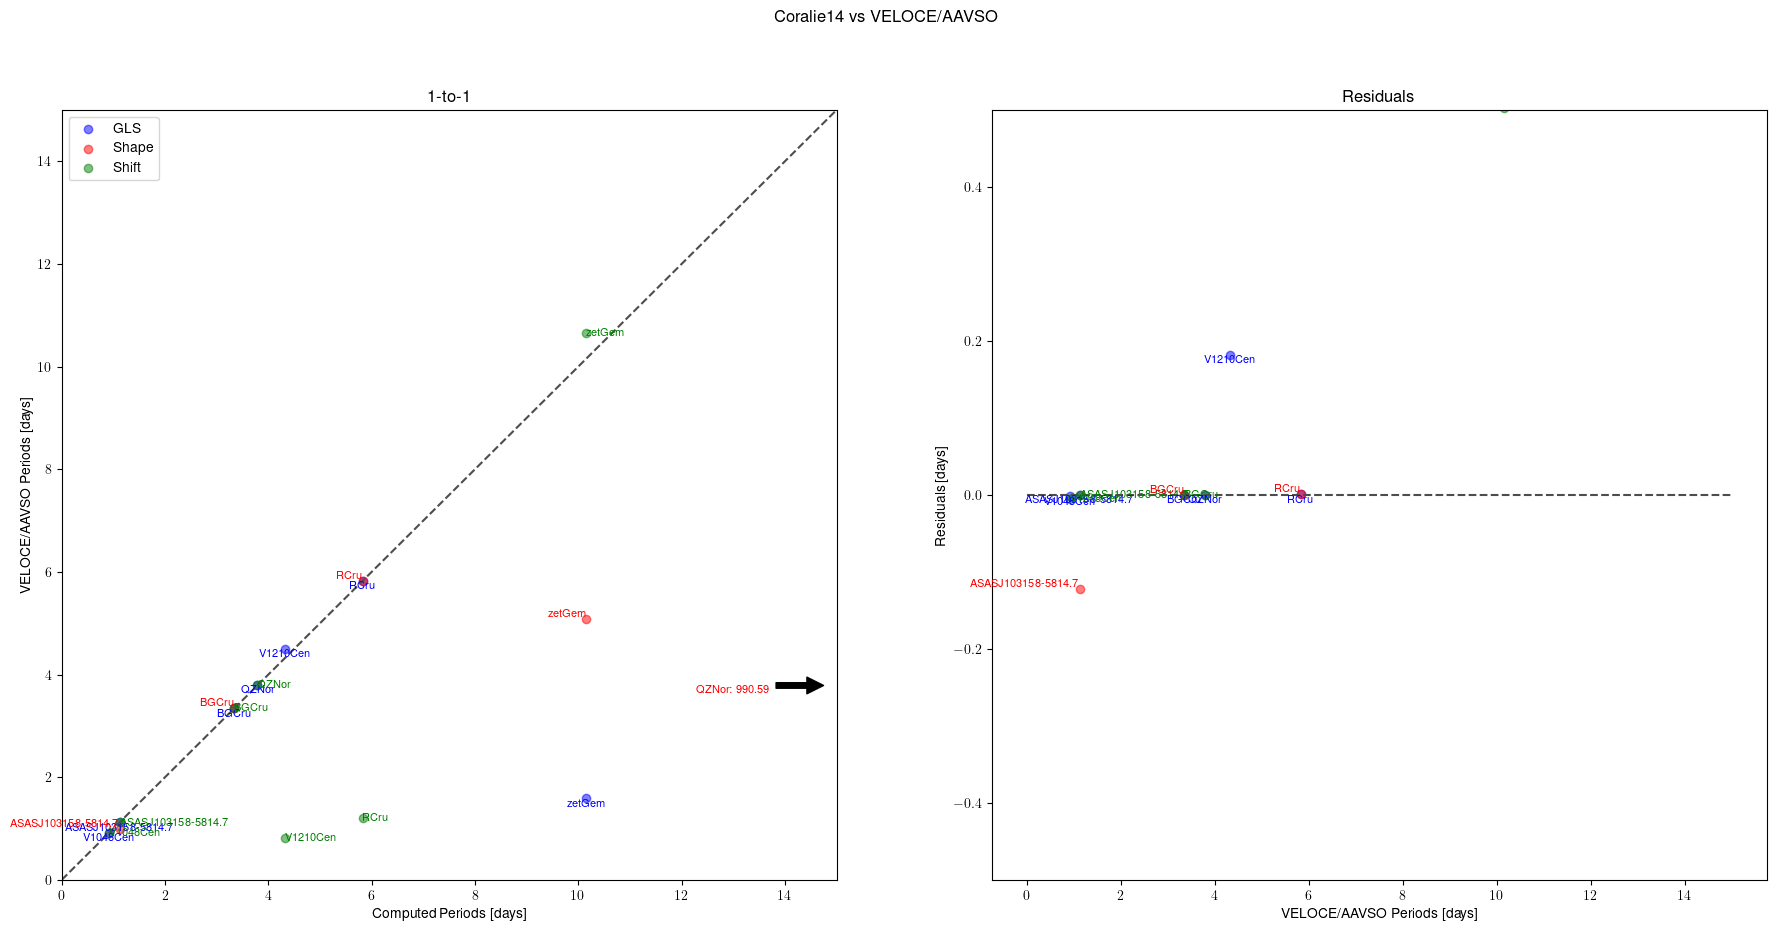

In [125]:
#same for Coralie
fig,ax = plt.subplots(1,2,figsize=(22,10))
for i, row in merged_coralie.iterrows():
    if row['star']=='QZNor':
        ax[0].text(row['period'], row['gls'], row['star'], fontsize=8, ha='center', va='top', color='blue')
        ax[0].text(row['period'], row['shift'], row['star'], fontsize=8, ha='left', va='center', color='green')
        ax[0].annotate(row['star']+': 990.59', xy=(14.8,row['period']), xytext=(13, row['period']), fontsize=8, ha='center', va='top', color='red', arrowprops=dict(facecolor='black', shrink=0.05))
    else:
        ax[0].text(row['period'], row['gls'], row['star'], fontsize=8, ha='center', va='top', color='blue')
        ax[0].text(row['period'], row['shape'], row['star'], fontsize=8, ha='right', va='bottom', color='red')
        ax[0].text(row['period'], row['shift'], row['star'], fontsize=8, ha='left', va='center', color='green')
    if abs(coralie14_residuals['gls'][i]) > 0.5:
        continue
    else:
        ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['gls'][i], row['star'], fontsize=8, ha='center', va='top', color='blue')
    if abs(coralie14_residuals['shape'][i]) > 0.5:
        continue
    else:
        ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['shape'][i], row['star'], fontsize=8, ha='right', va='bottom', color='red')
    if abs(coralie14_residuals['shift'][i]) > 0.5:
        continue
    else:
        ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['shift'][i], row['star'], fontsize=8, ha='left', va='center', color='green')
ax[0].scatter(merged_coralie['period'], merged_coralie['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
ax[0].scatter(merged_coralie['period'], merged_coralie['shape'], marker='o', color='red', label='Shape',alpha=0.5)
ax[0].scatter(merged_coralie['period'], merged_coralie['shift'], marker='o', color='green', label='Shift',alpha=0.5)
ax[0].set_ylabel('VELOCE/AAVSO Periods [days]')
ax[0].set_xlabel('Computed Periods [days]')
ax[0].set_xlim(0, 15)
ax[0].set_ylim(0, 15)
plt.suptitle('Coralie14 vs VELOCE/AAVSO')
ax[0].legend(loc='upper left')
ax[0].plot([0, 15], [0, 15], ls='--',c='.3')
ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['shape'], marker='o', color='red', label='Shape',alpha=0.5)
ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['shift'], marker='o', color='green', label='Shift',alpha=0.5)
ax[1].plot([0, 15], [0, 0], ls="--", c=".3")
ax[1].set_ylim(-0.5,0.5)
ax[1].set_ylabel('Residuals [days]')
ax[1].set_xlabel('VELOCE/AAVSO Periods [days]')
ax[1].set_title('Residuals')
ax[0].set_title('1-to-1')
plt.savefig('Coralie14_main_onetoone.pdf')
plt.show()

## One-to-one per wv range

### Hermes

In [142]:
range_size_hermes = [r'4000-4200 $\AA$',r'$H_{\beta}$',r'5000-5100 $\AA$',r'5000-5200 $\AA$',r'$H_{\alpha}$',r'7420-7520 $\AA$']
range_size_hermes_nolatex = ['4000-4200','Hbeta','5000-5100','5000-5200','Halpha','7420-7520']
hermes_4000_4200 = pd.read_csv('Hermes_mixed_peaks_4000_4200.csv')
hermes_hbeta = pd.read_csv('Hermes_mixed_peaks_Hbeta.csv')
hermes_5000_5100 = pd.read_csv('Hermes_mixed_peaks_5000_5100.csv')
hermes_5000_5200 = pd.read_csv('Hermes_mixed_peaks_5000_5200.csv')
hermes_halpha = pd.read_csv('Hermes_mixed_peaks_Halpha.csv')
hermes_7420_7520 = pd.read_csv('Hermes_mixed_peaks_7420_7520.csv')
hermes = [hermes_4000_4200, hermes_hbeta, hermes_5000_5100, hermes_5000_5200, hermes_halpha, hermes_7420_7520]


In [172]:
for idx, range in enumerate(range_size_hermes_nolatex):
    merged_hermes_peaks = pd.merge(truth_periods, hermes[idx], on='star')
    hermes_residuals = pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float)
    for i, row in merged_hermes_peaks.iterrows():
        hermes_residuals = hermes_residuals.append({'star': row['star'], 'period': row['period'], 'residual_gls': row['gls'] - row['period'], 'residual_shape': row['shape'] - row['period'], 'residual_shift': row['shift'] - row['period']}, ignore_index=True)
    #merge merged_coralie_peaks and coralie14_residuals on star and period
    merged_hermes = pd.merge(merged_hermes_peaks, hermes_residuals, on=['star', 'period'])
    print(range)
    print(merged_hermes)
    #save in csv
    merged_hermes.to_csv('Hermes_peaks_data_'+range+'.csv', index=False)

4000-4200
       star     period        gls      shape      shift  residual_gls  \
0    delCep   5.366267   5.366230   5.366230   5.366756     -0.000037   
1     RRLyr   0.566777   0.566765   0.566765   0.566765     -0.000012   
2     SZCas  13.638961  13.639506  13.639506  11.109631      0.000545   
3     SZTau   3.148432   3.148739   3.148565   3.148739      0.000307   
4     TUCas   2.139298   2.199876   2.139377   1.517200      0.060578   
5  V1154Cyg   4.925416   4.924942   4.924942   1.649816     -0.000474   
6    zetGem  10.149531  10.147953  10.150329   0.924746     -0.001578   

   residual_shape  residual_shift  
0       -0.000037        0.000489  
1       -0.000012       -0.000012  
2        0.000545       -2.529330  
3        0.000133        0.000307  
4        0.000079       -0.622098  
5       -0.000474       -3.275600  
6        0.000798       -9.224785  
Hbeta
       star     period        gls      shape      shift  residual_gls  \
0    delCep   5.366267   5.366230   5.

In [133]:
%matplotlib inline

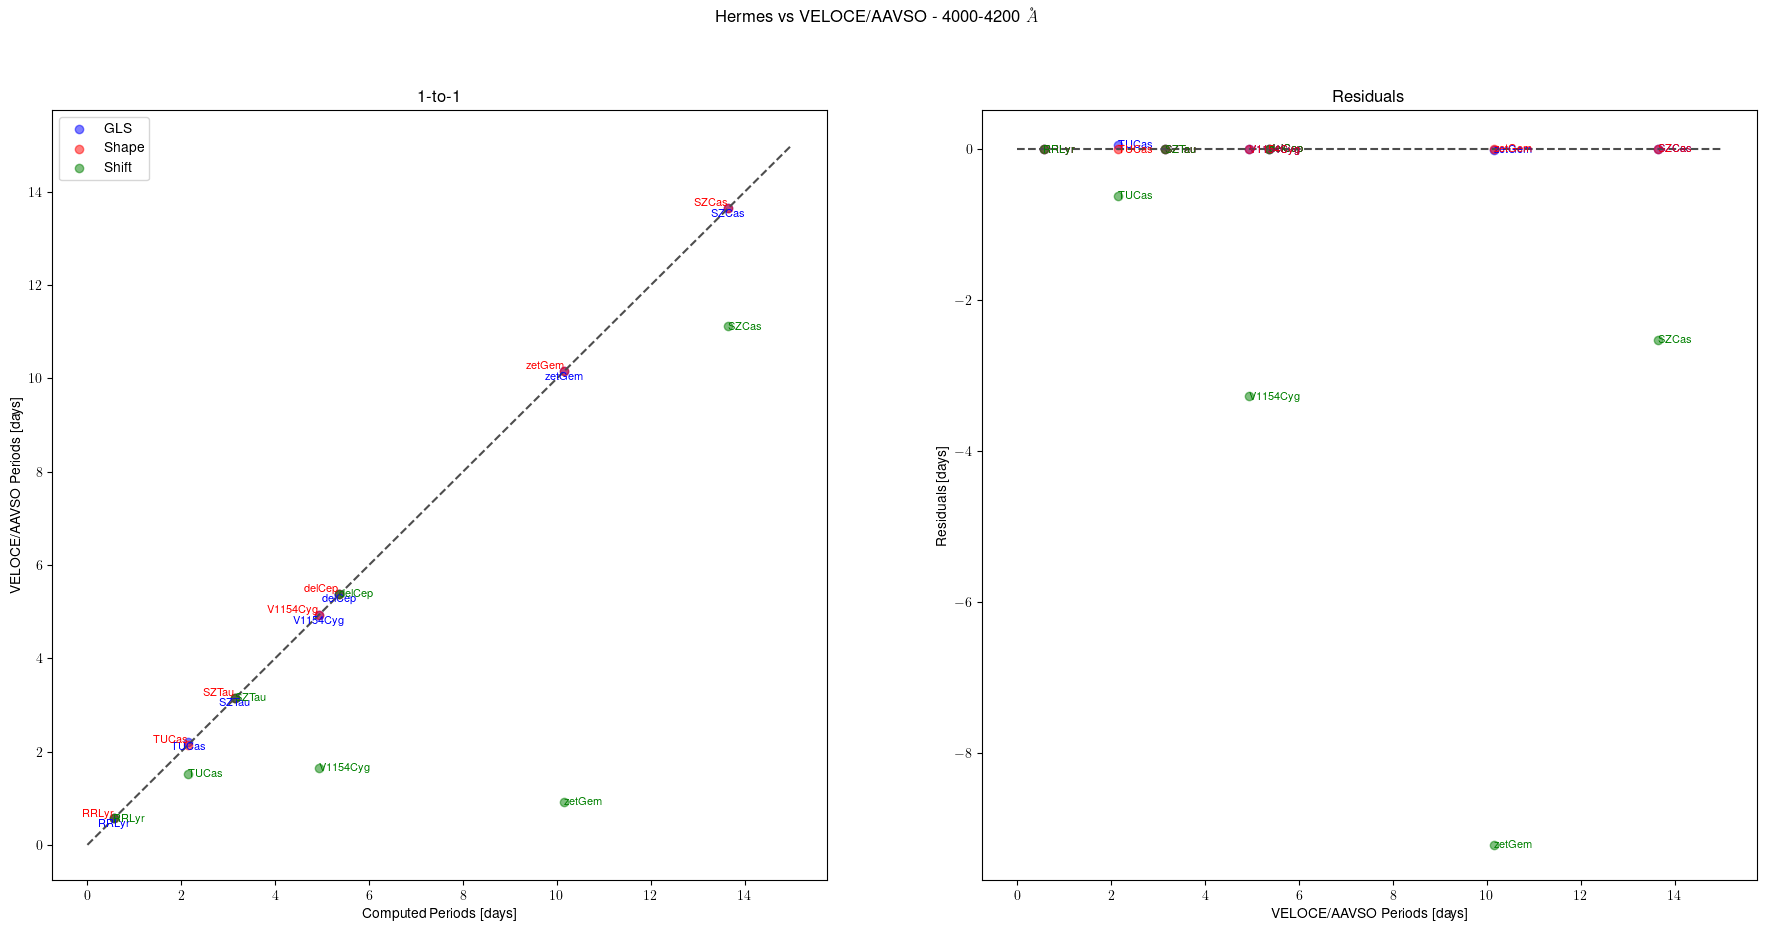

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


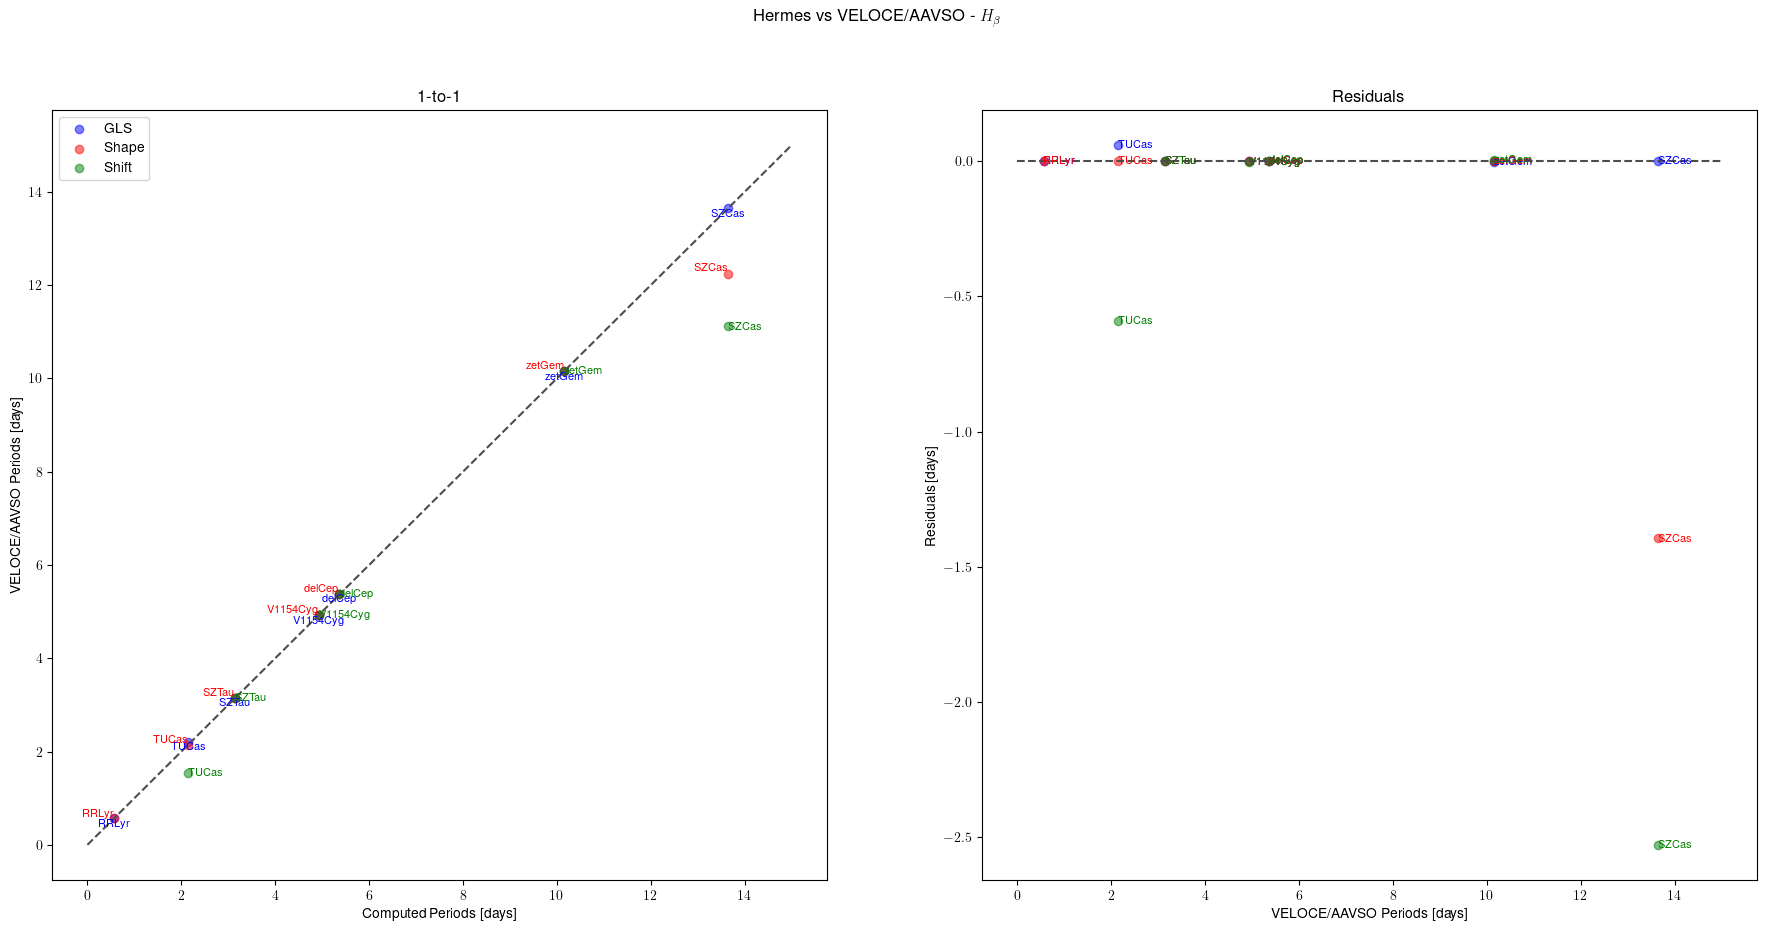

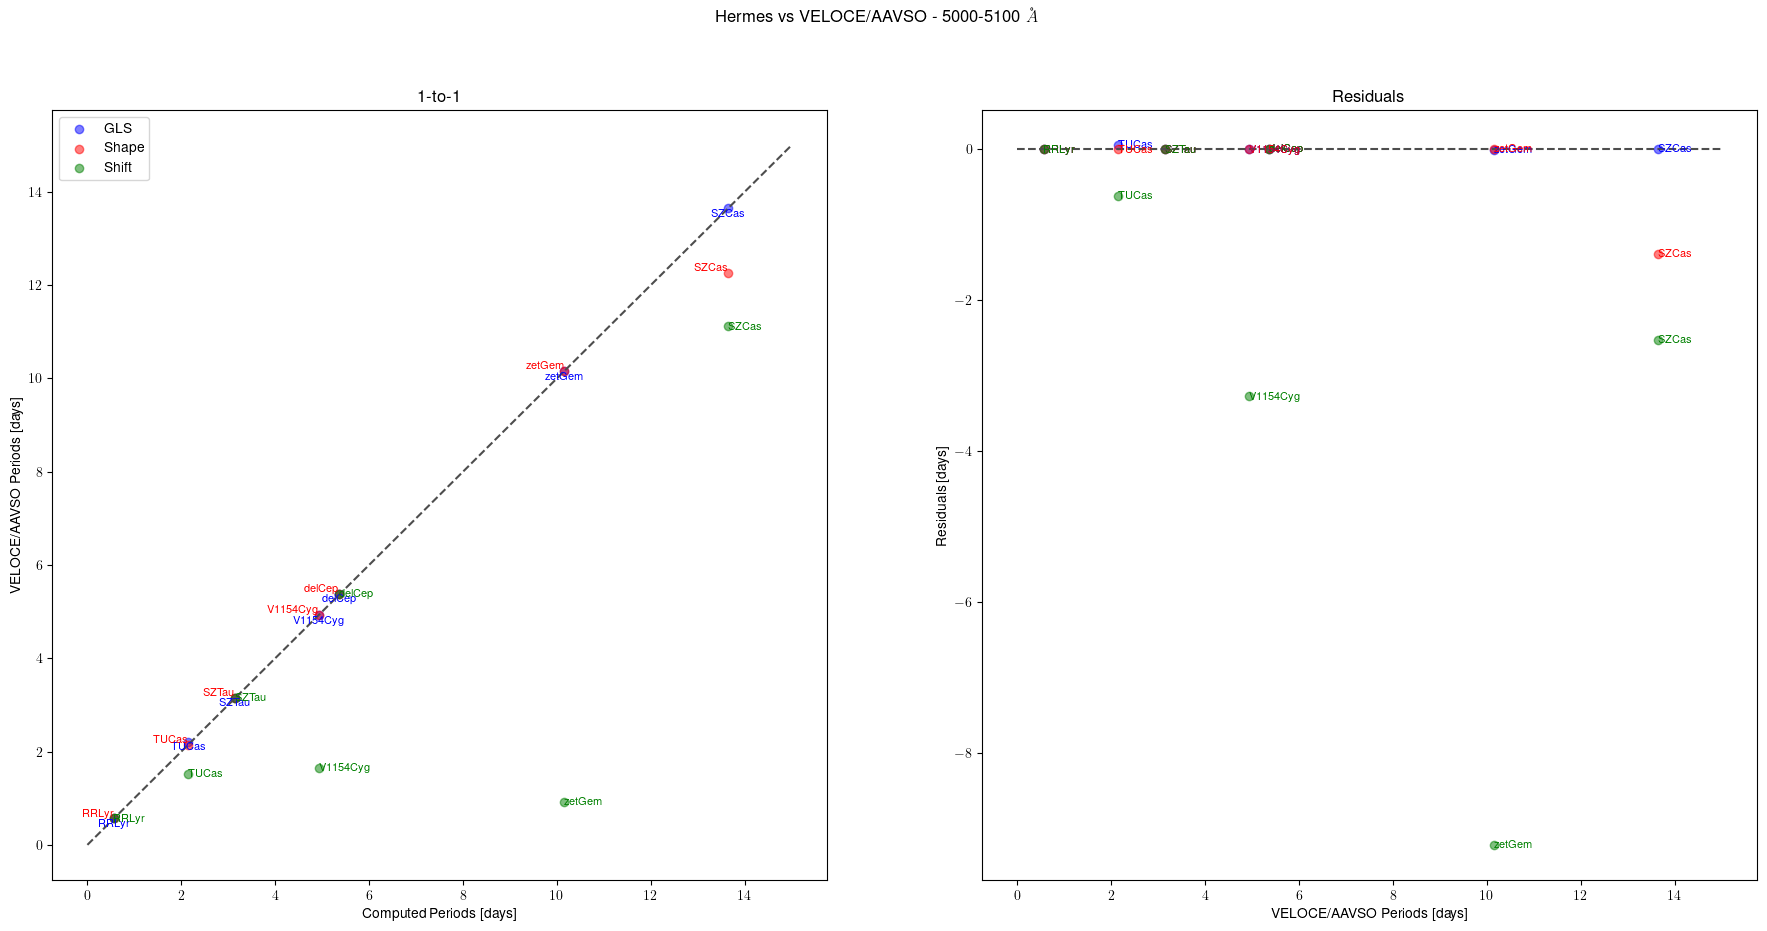

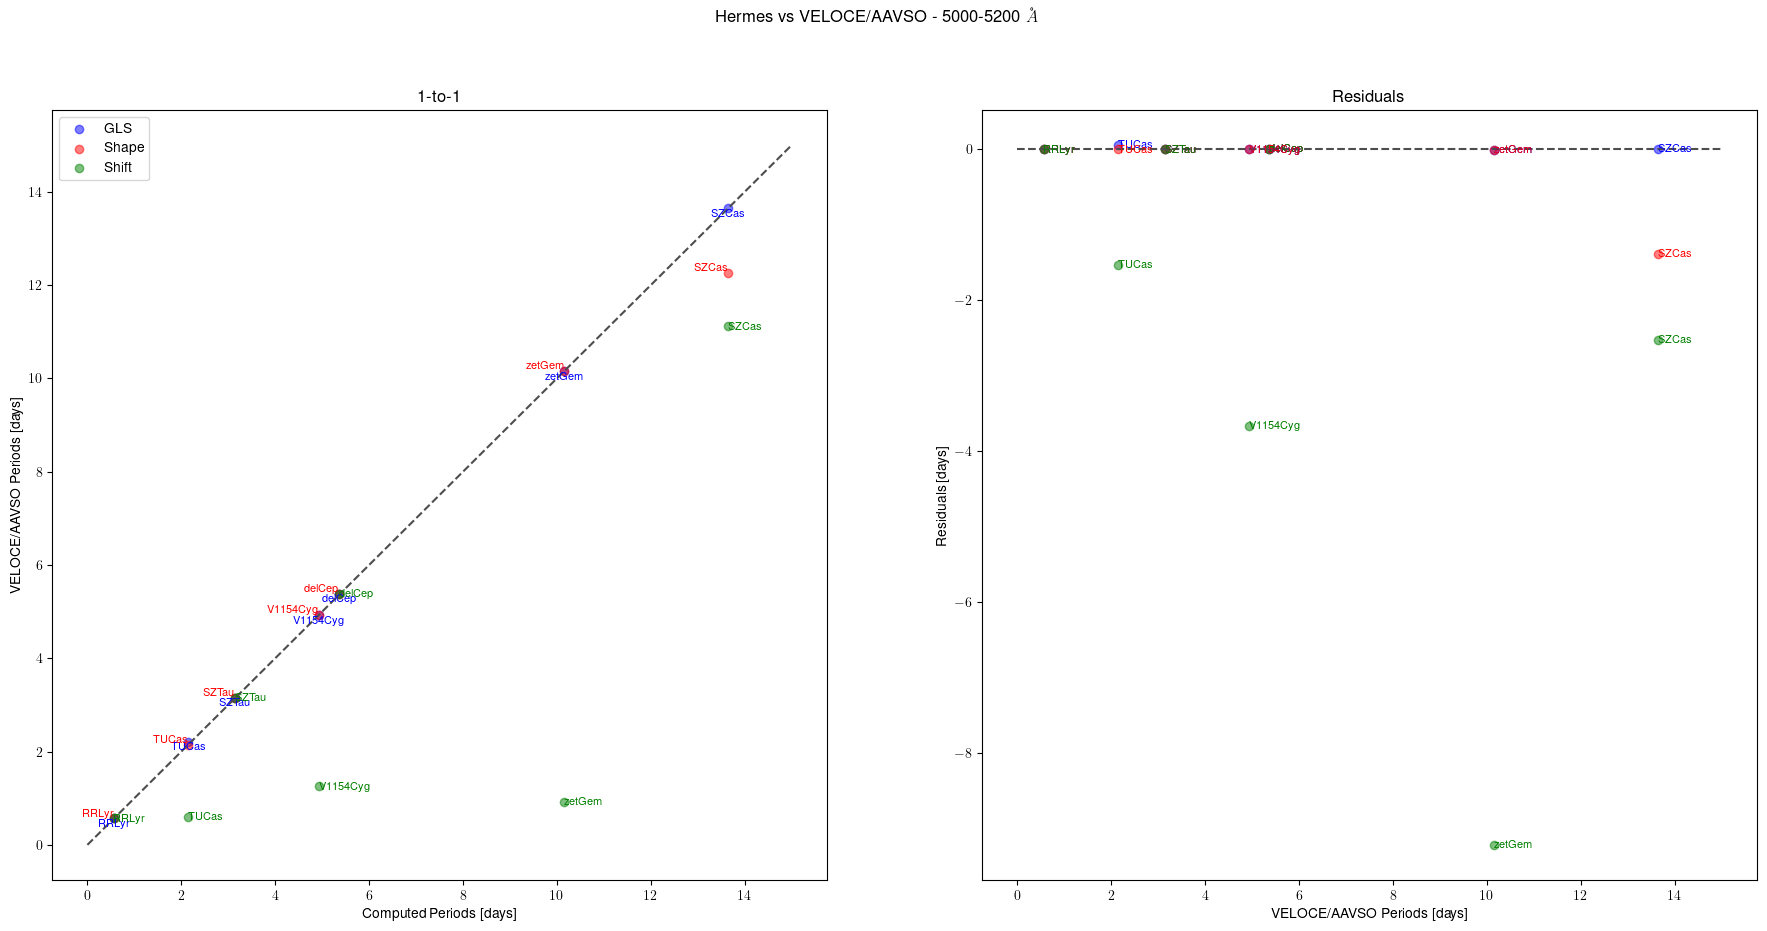

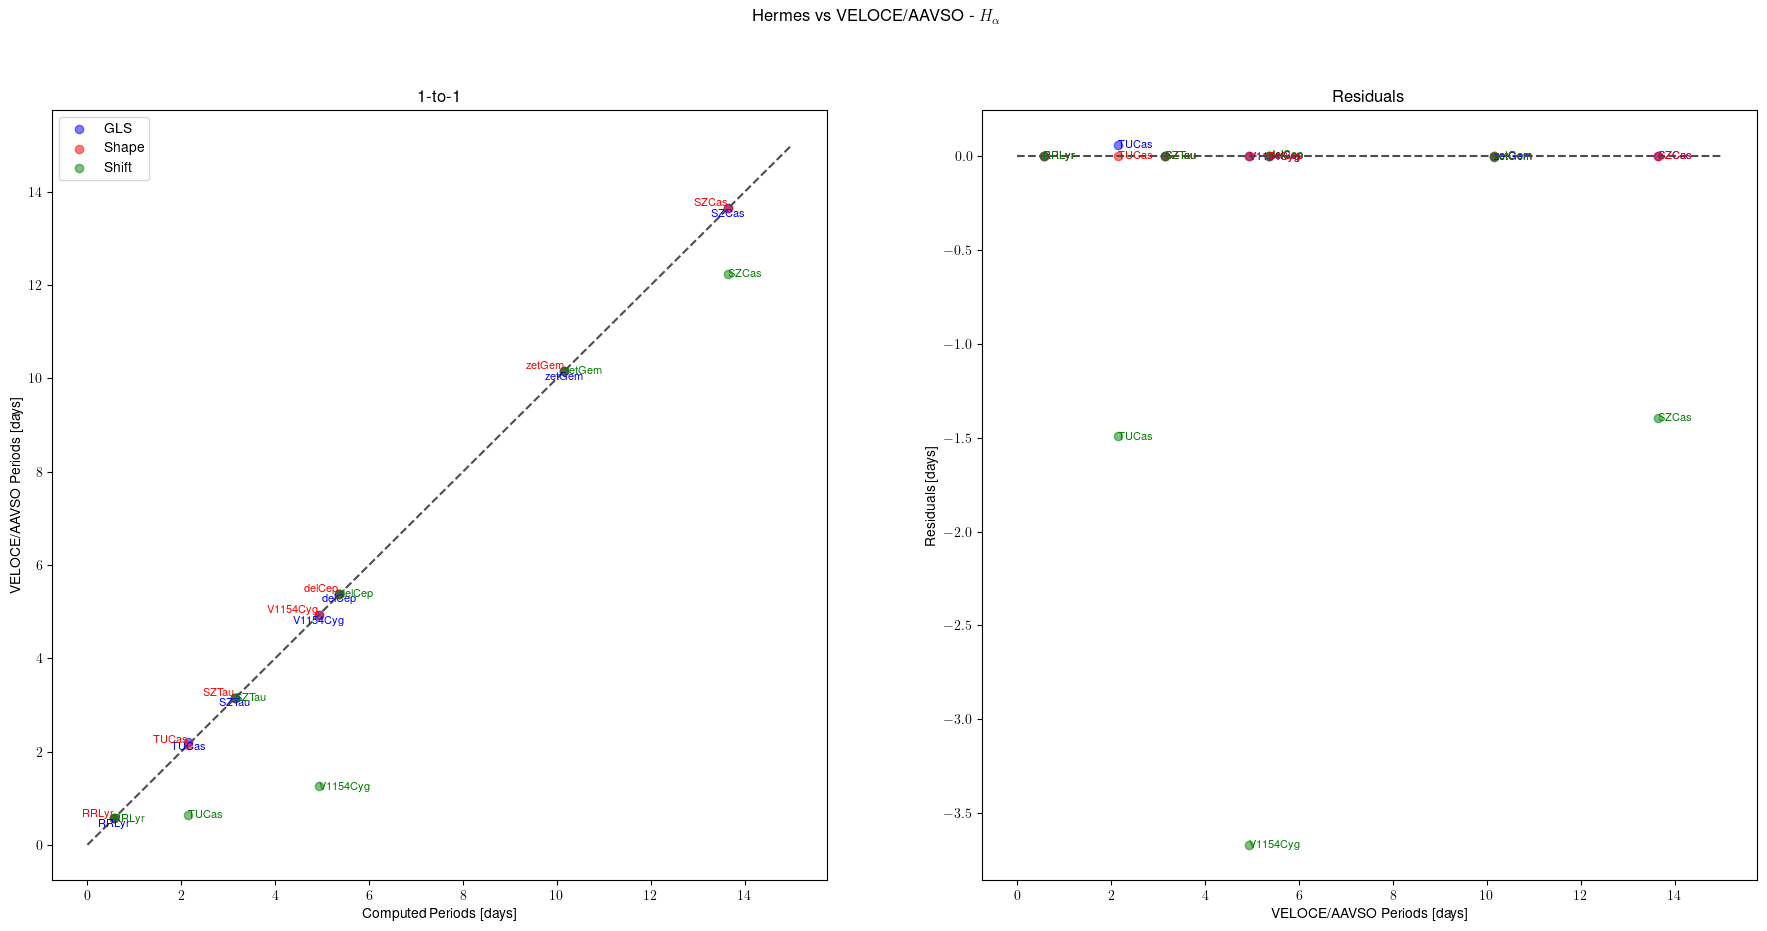

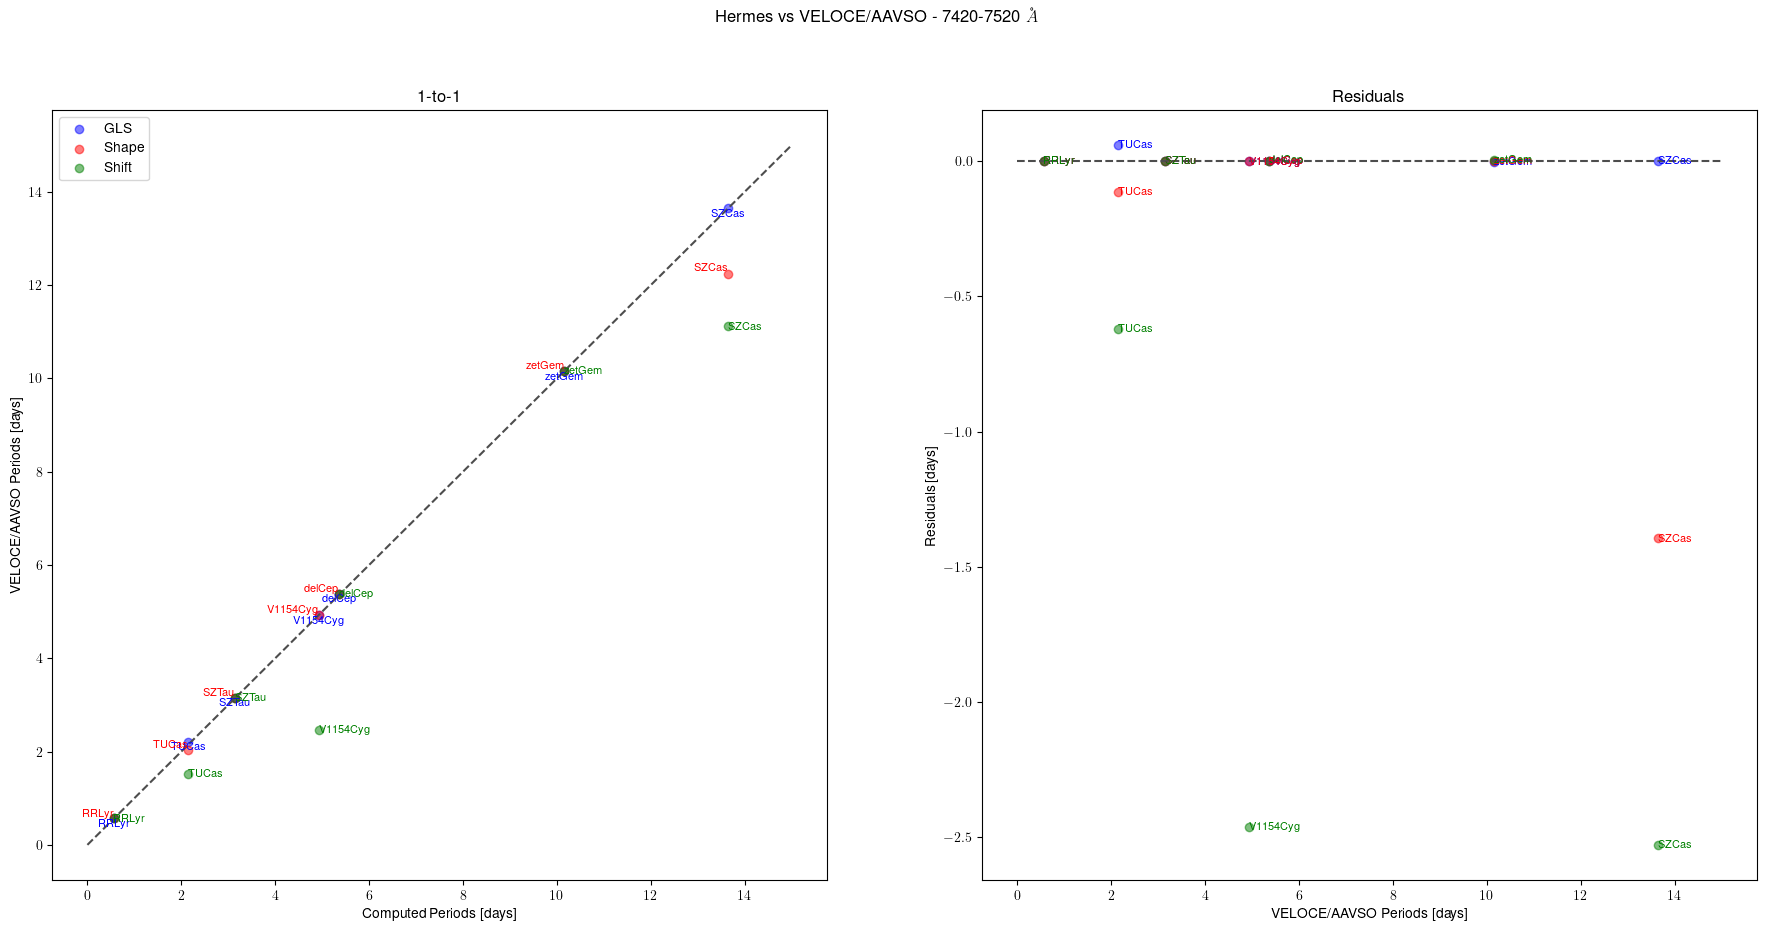

In [141]:
for (idx, range),(_,range2) in zip(enumerate(range_size_hermes),enumerate(range_size_hermes_nolatex)):
    merged_hermes = pd.merge(truth_periods, hermes[idx], on='star')
    hermes_residuals = pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift'], dtype=float)
    for i, row in merged_hermes.iterrows():
        hermes_residuals = hermes_residuals.append({'star': row['star'], 'period': row['period'], 'gls': row['gls'] - row['period'], 'shape': row['shape'] - row['period'], 'shift': row['shift'] - row['period']}, ignore_index=True)
    fig,ax = plt.subplots(1,2,figsize=(22,10))
    for i, row in merged_hermes.iterrows():
        ax[0].text(row['period'], row['gls'], row['star'], fontsize=8, ha='center', va='top', color='blue')
        ax[0].text(row['period'], row['shape'], row['star'], fontsize=8, ha='right', va='bottom', color='red')
        ax[0].text(row['period'], row['shift'], row['star'], fontsize=8, ha='left', va='center', color='green')
        # if abs(hermes_residuals['gls'][i]) > 0.5:
        #     continue
        # else:
        #     ax[1].text(hermes_residuals['period'][i], hermes_residuals['gls'][i], row['star'], fontsize=8, ha='center', va='top', color='blue')
        # if abs(hermes_residuals['shape'][i]) > 0.5:
        #     continue
        # else:
        #     ax[1].text(hermes_residuals['period'][i], hermes_residuals['shape'][i], row['star'], fontsize=8, ha='right', va='bottom', color='red')
        # if abs(hermes_residuals['shift'][i]) > 0.5:
        #     continue
        # else:
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['gls'][i], row['star'], fontsize=8, ha='left', va='center', color='blue')
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['shape'][i], row['star'], fontsize=8, ha='left', va='center', color='red')
        ax[1].text(hermes_residuals['period'][i], hermes_residuals['shift'][i], row['star'], fontsize=8, ha='left', va='center', color='green')
    ax[0].scatter(merged_hermes['period'], merged_hermes['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
    ax[0].scatter(merged_hermes['period'], merged_hermes['shape'], marker='o', color='red', label='Shape',alpha=0.5)
    ax[0].scatter(merged_hermes['period'], merged_hermes['shift'], marker='o', color='green', label='Shift',alpha=0.5)
    ax[0].plot([0, 15], [0, 15],ls='--', c='.3')
    ax[0].set_ylabel(r'VELOCE/AAVSO Periods [days]')
    ax[0].set_xlabel(r'Computed Periods [days]')
    ax[0].set_title(r'1-to-1')
    fig.suptitle(r'Hermes vs VELOCE/AAVSO - '+range)
    ax[0].legend(loc='upper left')
    ax[1].scatter(hermes_residuals['period'], hermes_residuals['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
    ax[1].scatter(hermes_residuals['period'], hermes_residuals['shape'], marker='o', color='red', label='Shape',alpha=0.5)
    ax[1].scatter(hermes_residuals['period'], hermes_residuals['shift'], marker='o', color='green', label='Shift',alpha=0.5)
    ax[1].plot([0, 15], [0, 0], ls="--", c=".3")
    # ax[1].set_ylim(-0.5,0.5)
    ax[1].set_ylabel(r'Residuals [days]')
    ax[1].set_xlabel(r'VELOCE/AAVSO Periods [days]')
    ax[1].set_title(r'Residuals')
    plt.savefig('Hermes_mixed_onetoone_'+range2+'.pdf')
    plt.show()
    

### Coralie

In [152]:
range_size_coralie = [r'4000-4200 $\AA$',r'$H_{\beta}$',r'5000-5100 $\AA$',r'$H_{\alpha}$']
range_size_coralie_nolatex = ['4000-4200','Hbeta','5000-5100','Halpha']
coralie_4000_4200 = pd.read_csv('Coralie14_main_peaks_4000_4200.csv')
coralie_hbeta = pd.read_csv('Coralie14_main_peaks_Hbeta.csv')
coralie_5000_5100 = pd.read_csv('Coralie14_main_peaks_5000_5100.csv')
coralie_halpha = pd.read_csv('Coralie14_main_peaks_Halpha.csv')
coralie14 = [coralie_4000_4200, coralie_hbeta, coralie_5000_5100, coralie_halpha]

In [171]:
for idx, range in enumerate(range_size_coralie_nolatex):
    merged_coralie_peaks = pd.merge(truth_periods, coralie14[idx], on='star')
    coralie_residuals = pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float)
    for i, row in merged_coralie_peaks.iterrows():
        coralie_residuals = coralie_residuals.append({'star': row['star'], 'period': row['period'], 'residual_gls': row['gls'] - row['period'], 'residual_shape': row['shape'] - row['period'], 'residual_shift': row['shift'] - row['period']}, ignore_index=True)
    #merge merged_coralie_peaks and coralie14_residuals on star and period
    merged_coralie = pd.merge(merged_coralie_peaks, coralie_residuals, on=['star', 'period'])
    print(range)
    print(merged_coralie)
    #save in csv
    merged_coralie.to_csv('Coralie14_peaks_data_'+range+'.csv', index=False)

4000-4200
                 star     period       gls       shape      shift  \
0  ASASJ103158-5814.7   1.119200  1.119166    0.997021   1.119166   
1               BGCru   3.342540  3.342398    3.342847   3.342398   
2               QZNor   3.786811  3.786540  990.586014   3.786540   
3                RCru   5.825680  5.826409    5.826409   1.203166   
4            V1048Cen   0.922405  0.920307         NaN   0.917517   
5            V1210Cen   4.317000  4.498667         NaN   0.808013   
6              zetGem  10.149531  0.997675    5.084326  10.652371   

   residual_gls  residual_shape  residual_shift  
0     -0.000034       -0.122179       -0.000034  
1     -0.000142        0.000307       -0.000142  
2     -0.000271      986.799203       -0.000271  
3      0.000729        0.000729       -4.622514  
4     -0.002098             NaN       -0.004888  
5      0.181667             NaN       -3.508987  
6     -9.151856       -5.065205        0.502840  
Hbeta
                 star     perio

4000-4200
                 star     period       gls       shape      shift
0  ASASJ103158-5814.7   1.119200  1.119166    0.997021   1.119166
1               BGCru   3.342540  3.342398    3.342847   3.342398
2               QZNor   3.786811  3.786540  990.586014   3.786540
3                RCru   5.825680  5.826409    5.826409   1.203166
4            V1048Cen   0.922405  0.920307         NaN   0.917517
5            V1210Cen   4.317000  4.498667         NaN   0.808013
6              zetGem  10.149531  0.997675    5.084326  10.652371
                 star     period       gls       shape     shift
0  ASASJ103158-5814.7   1.119200 -0.000034   -0.122179 -0.000034
1               BGCru   3.342540 -0.000142    0.000307 -0.000142
2               QZNor   3.786811 -0.000271  986.799203 -0.000271
3                RCru   5.825680  0.000729    0.000729 -4.622514
4            V1048Cen   0.922405 -0.002098         NaN -0.004888
5            V1210Cen   4.317000  0.181667         NaN -3.508987
6      

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


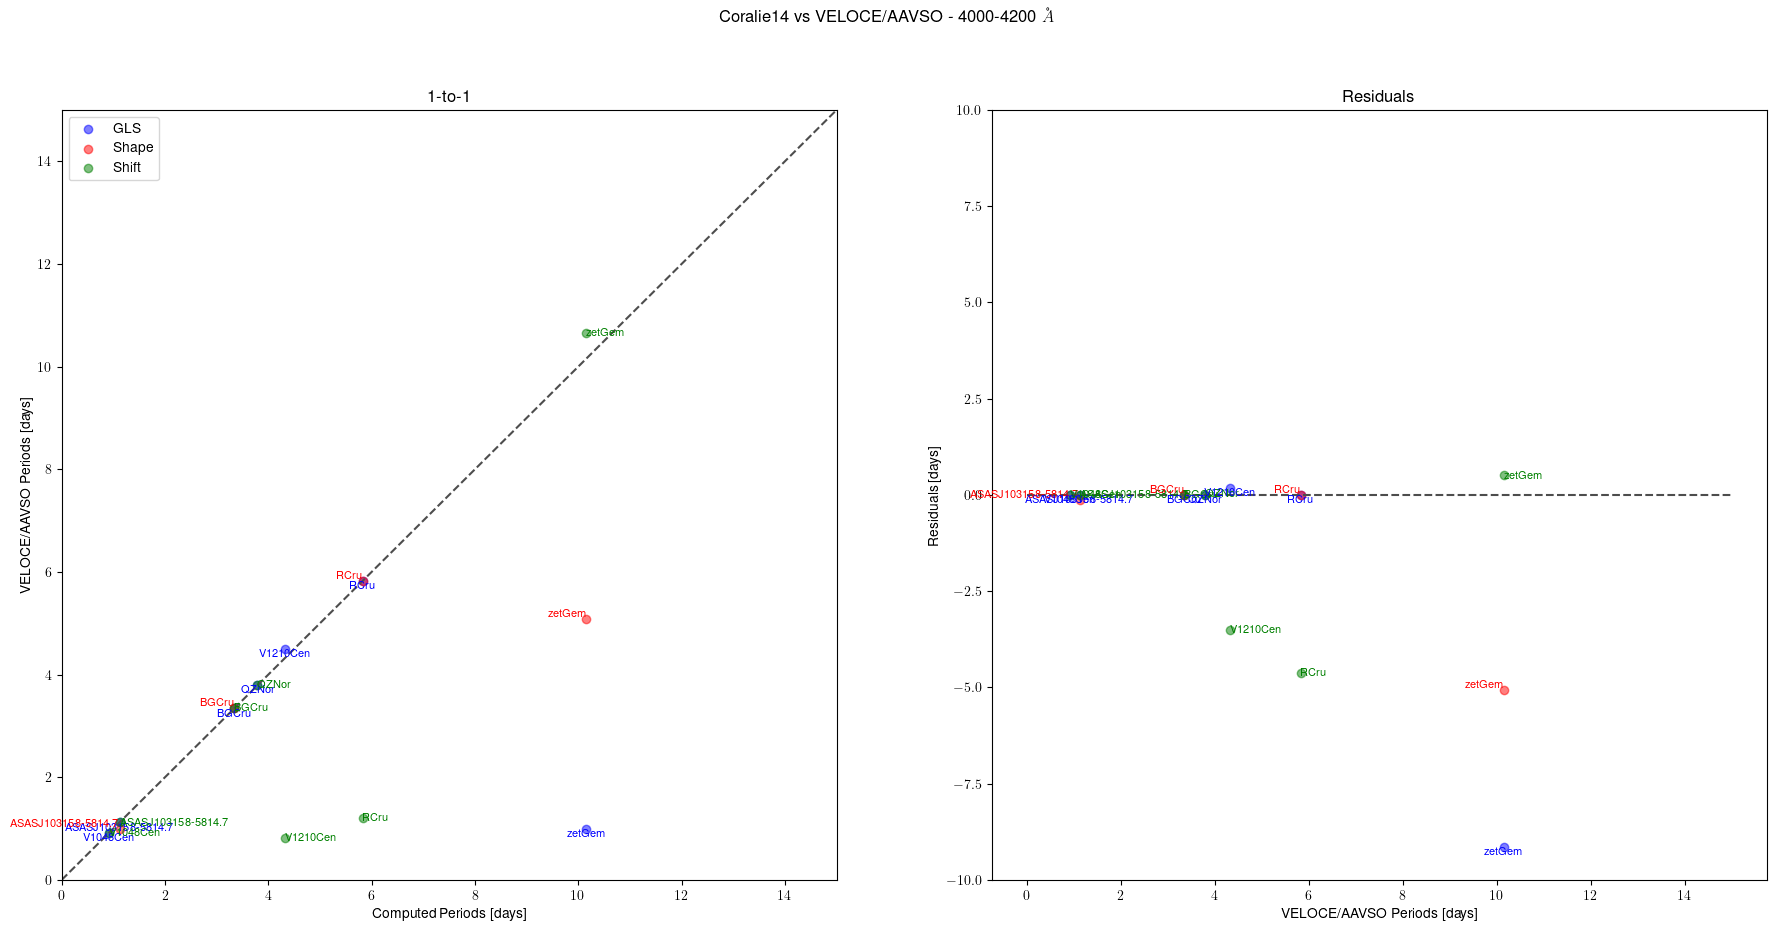

Hbeta
                 star     period       gls       shape      shift
0  ASASJ103158-5814.7   1.119200  1.119166         NaN   1.119166
1               BGCru   3.342540  3.342398    3.342847   3.342398
2               QZNor   3.786811  3.786540    3.787057   3.786540
3                RCru   5.825680  5.826409    5.826409   5.826409
4            V1048Cen   0.922405  0.920307         NaN   0.920053
5            V1210Cen   4.317000  4.498667  110.967128   0.808013
6              zetGem  10.149531  0.997675    5.014719  10.656799
                 star     period       gls       shape     shift
0  ASASJ103158-5814.7   1.119200 -0.000034         NaN -0.000034
1               BGCru   3.342540 -0.000142    0.000307 -0.000142
2               QZNor   3.786811 -0.000271    0.000246 -0.000271
3                RCru   5.825680  0.000729    0.000729  0.000729
4            V1048Cen   0.922405 -0.002098         NaN -0.002352
5            V1210Cen   4.317000  0.181667  106.650128 -3.508987
6          

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


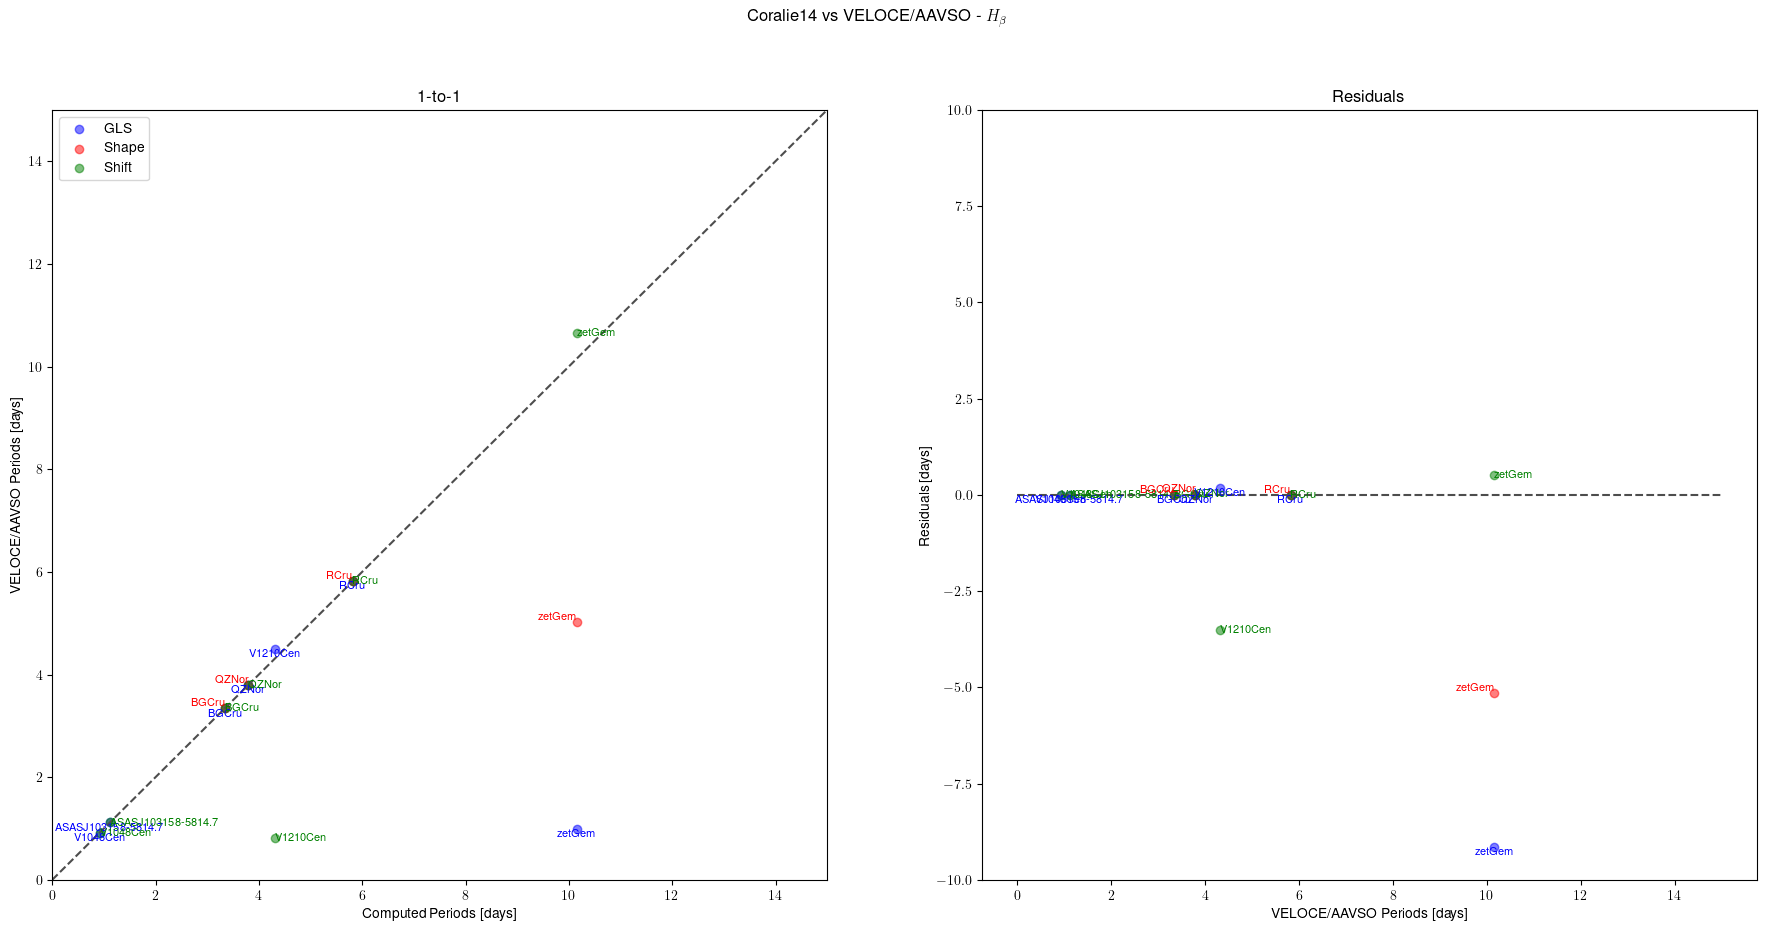

5000-5100
                 star     period       gls      shape      shift
0  ASASJ103158-5814.7   1.119200  1.119166   1.002243   1.119166
1               BGCru   3.342540  3.342398   3.008320   3.342398
2               QZNor   3.786811  3.786540   3.787057   3.786540
3                RCru   5.825680  5.826409   5.826409   1.203109
4            V1048Cen   0.922405  0.920307        NaN   0.917517
5            V1210Cen   4.317000  4.498667  41.098936   0.809979
6              zetGem  10.149531  0.997675   5.198755  10.652371
                 star     period       gls      shape     shift
0  ASASJ103158-5814.7   1.119200 -0.000034  -0.116957 -0.000034
1               BGCru   3.342540 -0.000142  -0.334220 -0.000142
2               QZNor   3.786811 -0.000271   0.000246 -0.000271
3                RCru   5.825680  0.000729   0.000729 -4.622571
4            V1048Cen   0.922405 -0.002098        NaN -0.004888
5            V1210Cen   4.317000  0.181667  36.781936 -3.507021
6              zetGem 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


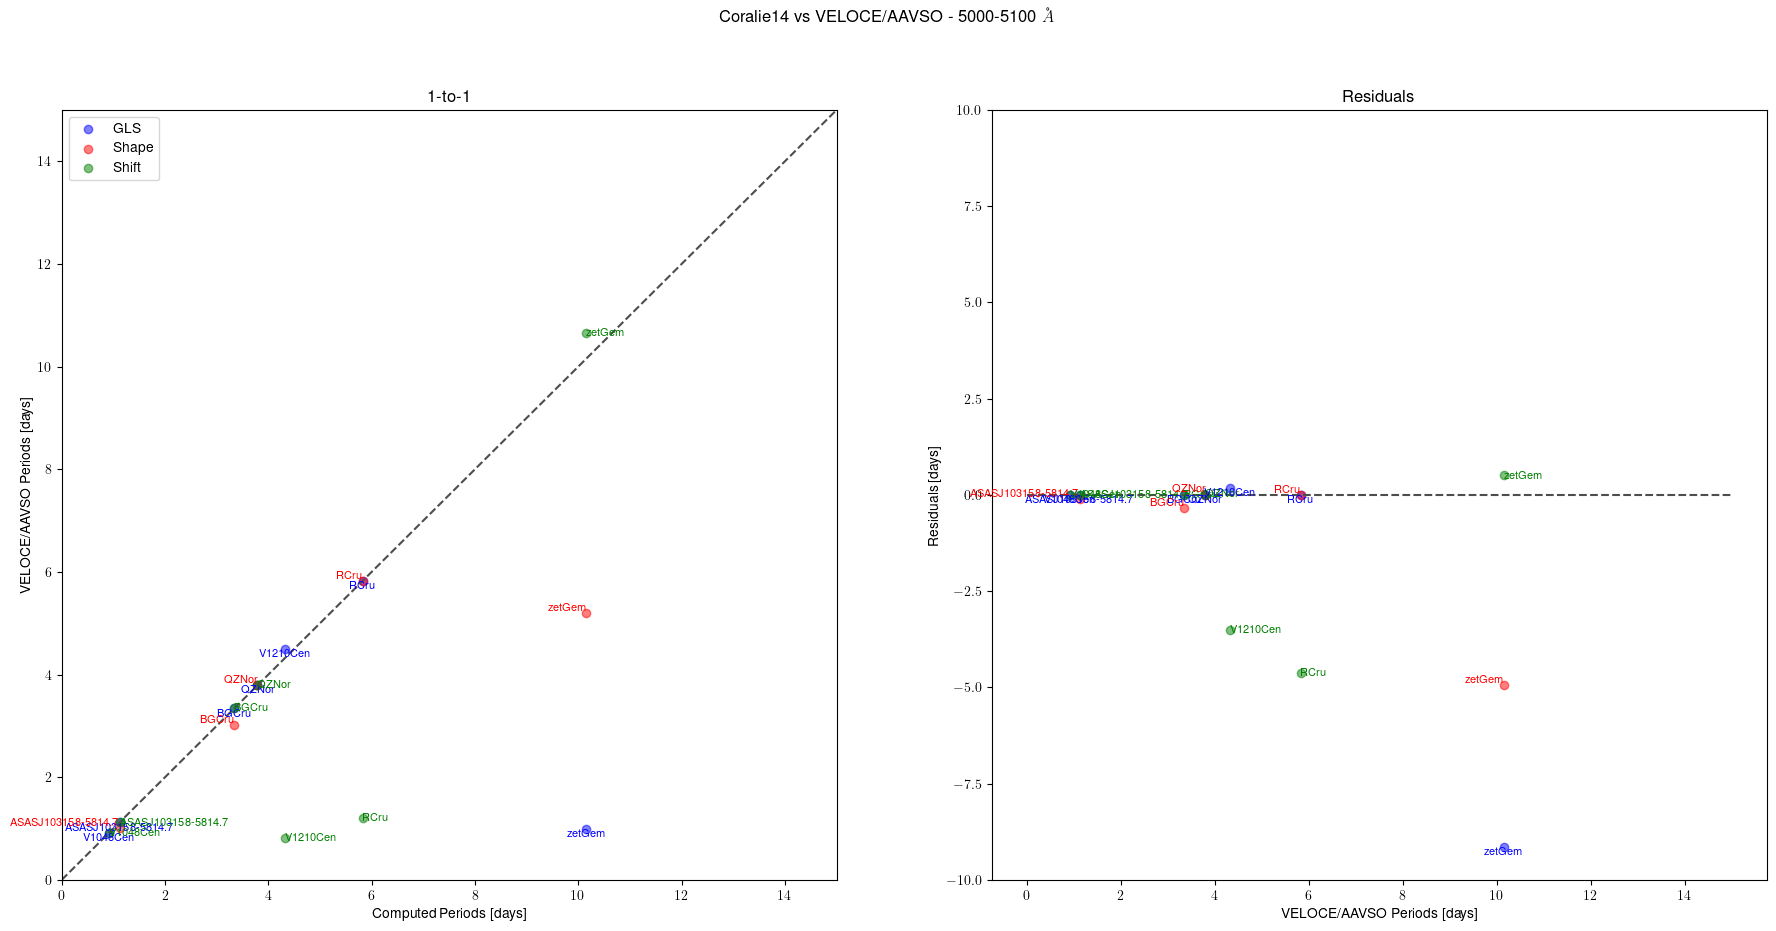

posx and posy should be finite values


Halpha
                 star     period       gls       shape     shift
0  ASASJ103158-5814.7   1.119200  1.119166    0.996179  1.119166
1               BGCru   3.342540  3.342398  366.041719  3.342398
2               QZNor   3.786811  3.786540    3.786540  3.786540
3                RCru   5.825680  5.826409    5.825070  5.826409
4            V1048Cen   0.922405  0.920307         NaN  0.917517
5            V1210Cen   4.317000  4.498667         NaN  0.808013
6              zetGem  10.149531  0.997675    5.064242  9.911193
                 star     period       gls       shape     shift
0  ASASJ103158-5814.7   1.119200 -0.000034   -0.123021 -0.000034
1               BGCru   3.342540 -0.000142  362.699179 -0.000142
2               QZNor   3.786811 -0.000271   -0.000271 -0.000271
3                RCru   5.825680  0.000729   -0.000610  0.000729
4            V1048Cen   0.922405 -0.002098         NaN -0.004888
5            V1210Cen   4.317000  0.181667         NaN -3.508987
6              zet

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


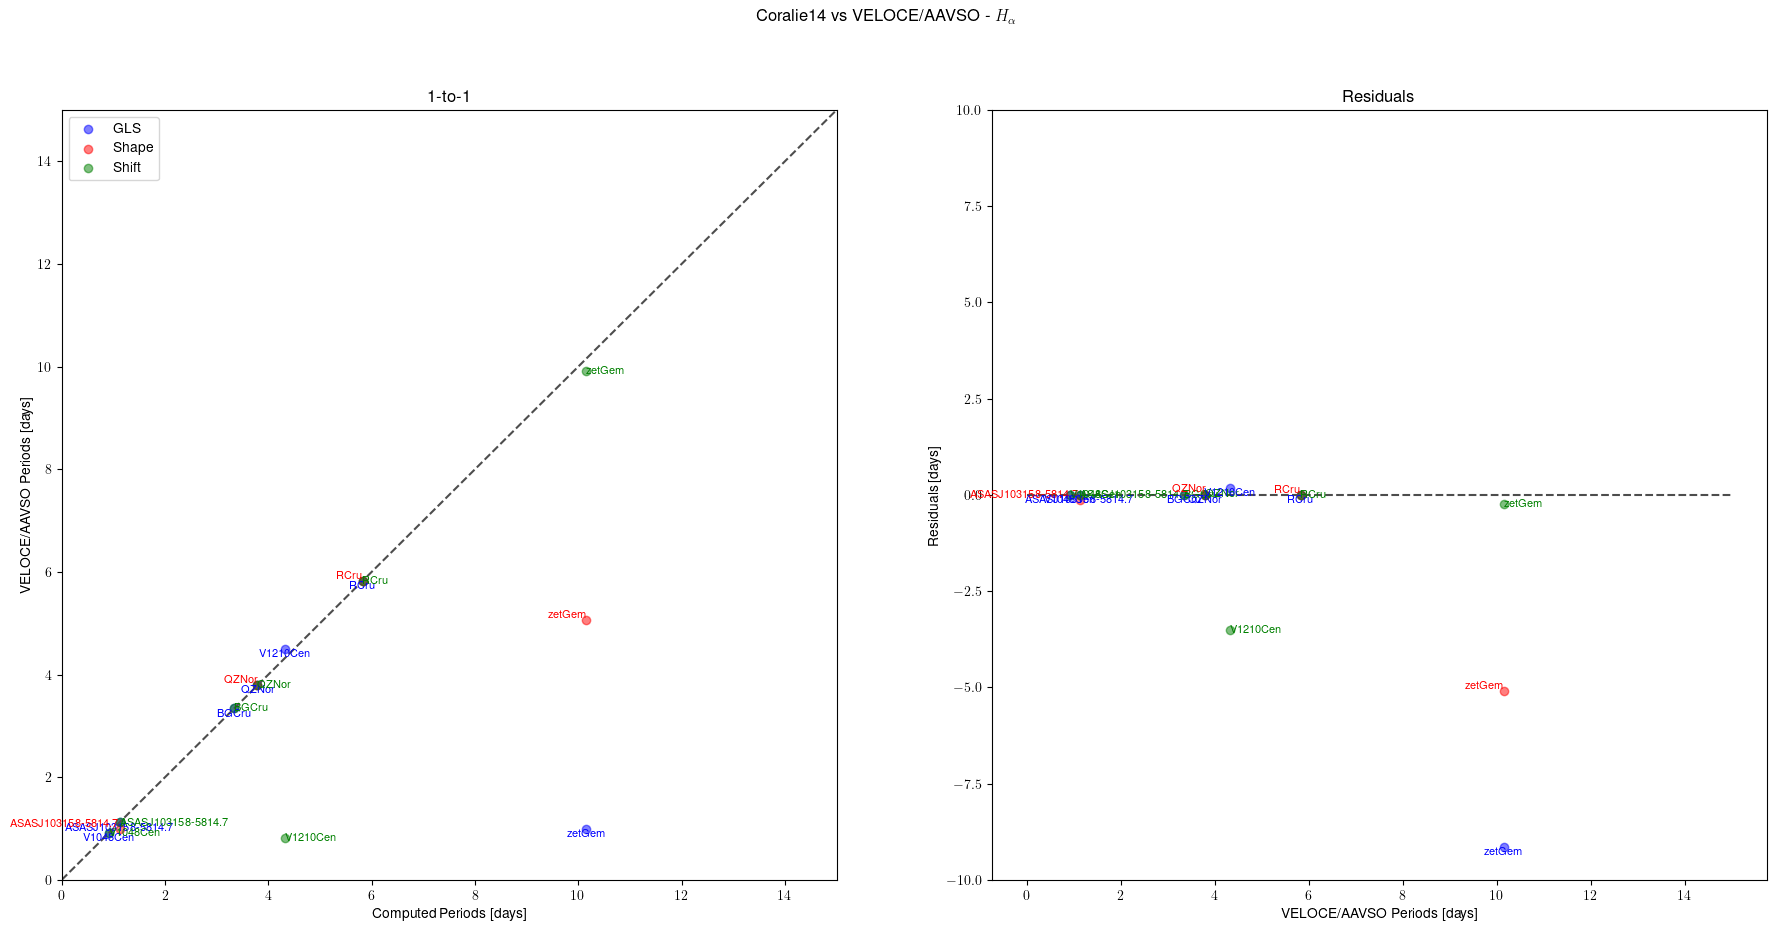

In [162]:
for (idx, range),(_,range2) in zip(enumerate(range_size_coralie),enumerate(range_size_coralie_nolatex)):
    merged_coralie = pd.merge(truth_periods, coralie14[idx], on='star')
    print(range2)
    print(merged_coralie)
    coralie14_residuals = pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift'], dtype=float)
    for i, row in merged_coralie.iterrows():
        coralie14_residuals = coralie14_residuals.append({'star': row['star'], 'period': row['period'], 'gls': row['gls'] - row['period'], 'shape': row['shape'] - row['period'], 'shift': row['shift'] - row['period']}, ignore_index=True)
    print(coralie14_residuals)
    fig,ax = plt.subplots(1,2,figsize=(22,10))
    for i, row in merged_coralie.iterrows():
        if abs(merged_coralie['gls'][i]) >15:
            pass
        else:
            ax[0].text(row['period'], row['gls'], row['star'], fontsize=8, ha='center', va='top', color='blue')
        if abs(merged_coralie['shape'][i]) >15:
            pass
        else:
            ax[0].text(row['period'], row['shape'], row['star'], fontsize=8, ha='right', va='bottom', color='red')
        if abs(merged_coralie['shift'][i]) >15:
            pass
        else:
            ax[0].text(row['period'], row['shift'], row['star'], fontsize=8, ha='left', va='center', color='green')
        if abs(coralie14_residuals['gls'][i]) > 10:
            print(range2, row['star'], coralie14_residuals['gls'][i])
            pass
        else:
            ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['gls'][i], row['star'], fontsize=8, ha='center', va='top', color='blue')
        if abs(coralie14_residuals['shape'][i]) > 10:
            print(range2, row['star'], coralie14_residuals['shape'][i])
            pass
        else:
            ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['shape'][i], row['star'], fontsize=8, ha='right', va='bottom', color='red')
        if abs(coralie14_residuals['shift'][i]) > 10:
            print(range2, row['star'], coralie14_residuals['shift'][i])
            pass
        else:
            ax[1].text(coralie14_residuals['period'][i], coralie14_residuals['shift'][i], row['star'], fontsize=8, ha='left', va='center', color='green')
    ax[0].scatter(merged_coralie['period'], merged_coralie['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
    ax[0].scatter(merged_coralie['period'], merged_coralie['shape'], marker='o', color='red', label='Shape',alpha=0.5)
    ax[0].scatter(merged_coralie['period'], merged_coralie['shift'], marker='o', color='green', label='Shift',alpha=0.5)
    ax[0].set_ylabel('VELOCE/AAVSO Periods [days]')
    ax[0].set_xlabel('Computed Periods [days]')
    ax[0].set_xlim(0, 15)
    ax[0].set_ylim(0, 15)
    plt.suptitle('Coralie14 vs VELOCE/AAVSO - '+range)
    ax[0].legend(loc='upper left')
    ax[0].plot([0, 15], [0, 15], ls='--',c='.3')
    ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['gls'], marker='o', color='blue', label='GLS',alpha=0.5)
    ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['shape'], marker='o', color='red', label='Shape',alpha=0.5)
    ax[1].scatter(coralie14_residuals['period'], coralie14_residuals['shift'], marker='o', color='green', label='Shift',alpha=0.5)
    ax[1].plot([0, 15], [0, 0], ls="--", c=".3")
    ax[1].set_ylim(-10,10)
    ax[1].set_ylabel('Residuals [days]')
    ax[1].set_xlabel('VELOCE/AAVSO Periods [days]')
    ax[1].set_title('Residuals')
    ax[0].set_title('1-to-1')
    plt.savefig('Coralie14_main_onetoone'+range2+'.pdf')
    plt.show()

## One-to-one that minimises the residuals

In [179]:
hermes_data = {'4000_4200':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float),
               'Hbeta':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float),
               '5000_5100':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float),
               '5000_5200':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float),
               'Halpha':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float),
               '7420_7520':pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float)}
for (idx,range),key in zip(enumerate(range_size_hermes),hermes_data.keys()):
    merged_hermes_peaks = pd.merge(truth_periods, hermes[idx], on='star')
    hermes_residuals = pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float)
    for i, row in merged_hermes_peaks.iterrows():
        hermes_residuals = hermes_residuals.append({'star': row['star'], 'period': row['period'], 'residual_gls': row['gls'] - row['period'], 'residual_shape': row['shape'] - row['period'], 'residual_shift': row['shift'] - row['period']}, ignore_index=True)
    #merge merged_coralie_peaks and coralie14_residuals on star and period
    merged_hermes = pd.merge(merged_hermes_peaks, hermes_residuals, on=['star', 'period'])
    hermes_data[key] = merged_hermes

In [216]:
for key in hermes_data.keys():
    print(key)
    print(hermes_data[key])

4000_4200
       star     period        gls      shape      shift  residual_gls  \
0    delCep   5.366267   5.366230   5.366230   5.366756     -0.000037   
1     RRLyr   0.566777   0.566765   0.566765   0.566765     -0.000012   
2     SZCas  13.638961  13.639506  13.639506  11.109631      0.000545   
3     SZTau   3.148432   3.148739   3.148565   3.148739      0.000307   
4     TUCas   2.139298   2.199876   2.139377   1.517200      0.060578   
5  V1154Cyg   4.925416   4.924942   4.924942   1.649816     -0.000474   
6    zetGem  10.149531  10.147953  10.150329   0.924746     -0.001578   

   residual_shape  residual_shift  
0       -0.000037        0.000489  
1       -0.000012       -0.000012  
2        0.000545       -2.529330  
3        0.000133        0.000307  
4        0.000079       -0.622098  
5       -0.000474       -3.275600  
6        0.000798       -9.224785  
Hbeta
       star     period        gls      shape      shift  residual_gls  \
0    delCep   5.366267   5.366230   5.

In [286]:
#get for each star the period with the lowest residual for each method and say which range it is
# best_periods_hermes = {'star':[], 'gls':[], 'shape':[], 'shift':[],'residual_gls':[],'residual_shape':[],'residual_shift':[],'range_gls':[],'range_shape':[],'range_shift':[]}
best_periods_hermes = pd.DataFrame(columns=['star', 'gls', 'shape', 'shift','residual_gls','residual_shape','residual_shift','range_gls','range_shape','range_shift'], dtype=float)
#initialising
for star in hermes_data['4000_4200']['star']:
    best_periods_hermes = best_periods_hermes.append({'star': star, 'gls': 1000, 'shape': 1000, 'shift': 1000,'residual_gls': 1000,'residual_shape': 1000,'residual_shift': 1000,'range_gls': [],'range_shape': [],'range_shift': []}, ignore_index=True)
for star in best_periods_hermes['star']:
    # print(star)
    min_gls = 1000
    min_shape = 1000
    min_shift = 1000
    res_gls = 1000
    res_shape = 1000
    res_shift = 1000
    range_gls = '4000_4200'
    range_shape = '4000_4200'
    range_shift = '4000_4200'
    for range in hermes_data.keys():
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_gls'].values[0]) < abs(res_gls):
            min_gls = hermes_data[range].loc[hermes_data[range]['star']==star]['gls'].values[0]
            res_gls = hermes_data[range].loc[hermes_data[range]['star']==star]['residual_gls'].values[0]
            range_gls = range
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shape'].values[0]) < abs(res_shape):
            min_shape = hermes_data[range].loc[hermes_data[range]['star']==star]['shape'].values[0]
            res_shape = hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shape'].values[0]
            range_shape = range
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shift'].values[0]) < abs(res_shift):
            min_shift = hermes_data[range].loc[hermes_data[range]['star']==star]['shift'].values[0]
            res_shift = hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shift'].values[0]
            range_shift = range
    best_periods_hermes.loc[best_periods_hermes['star']==star,'gls'] = min_gls
    best_periods_hermes.loc[best_periods_hermes['star']==star,'shape'] = min_shape
    best_periods_hermes.loc[best_periods_hermes['star']==star,'shift'] = min_shift
    best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_gls'] = res_gls
    best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_shape'] = res_shape
    best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_shift'] = res_shift
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'].apply(lambda x: [range_gls])
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'].apply(lambda x: [range_shape])
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'].apply(lambda x: [range_shift])
    for range in hermes_data.keys():
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_gls'].values[0]) == abs(best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_gls'].values[0]):
            best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'].apply(lambda x: x + [range])
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shape'].values[0]) == abs(best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_shape'].values[0]):
            best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'].apply(lambda x: x + [range])
        if abs(hermes_data[range].loc[hermes_data[range]['star']==star]['residual_shift'].values[0]) == abs(best_periods_hermes.loc[best_periods_hermes['star']==star,'residual_shift'].values[0]):
            best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'].apply(lambda x: x + [range])      
    # clear from duplicates in range_gls, range_shape, range_shift
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_gls'].apply(lambda x: list(set(x)))
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shape'].apply(lambda x: list(set(x)))
    best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'] = best_periods_hermes.loc[best_periods_hermes['star']==star,'range_shift'].apply(lambda x: list(set(x)))
print(best_periods_hermes)

       star        gls      shape      shift  residual_gls  residual_shape  \
0    delCep   5.366230   5.366230   5.366756     -0.000037       -0.000037   
1     RRLyr   0.566765   0.566765   0.566765     -0.000012       -0.000012   
2     SZCas  13.639506  13.639506  12.243190      0.000545        0.000545   
3     SZTau   3.148739   3.148565   3.148565      0.000307        0.000133   
4     TUCas   2.199876   2.139377   1.548562      0.060578        0.000079   
5  V1154Cyg   4.924942   4.925584   4.924301     -0.000474        0.000168   
6    zetGem  10.147953  10.150329  10.152707     -0.001578        0.000798   

   residual_shift                                          range_gls  \
0        0.000489  [5000_5100, 5000_5200, Hbeta, 4000_4200, 7420_...   
1       -0.000012  [5000_5100, 5000_5200, Hbeta, 4000_4200, 7420_...   
2       -1.395771  [5000_5100, 5000_5200, Hbeta, 4000_4200, 7420_...   
3        0.000133  [5000_5100, 5000_5200, Hbeta, 4000_4200, 7420_...   
4       -0.5907

KeyError: 'period'

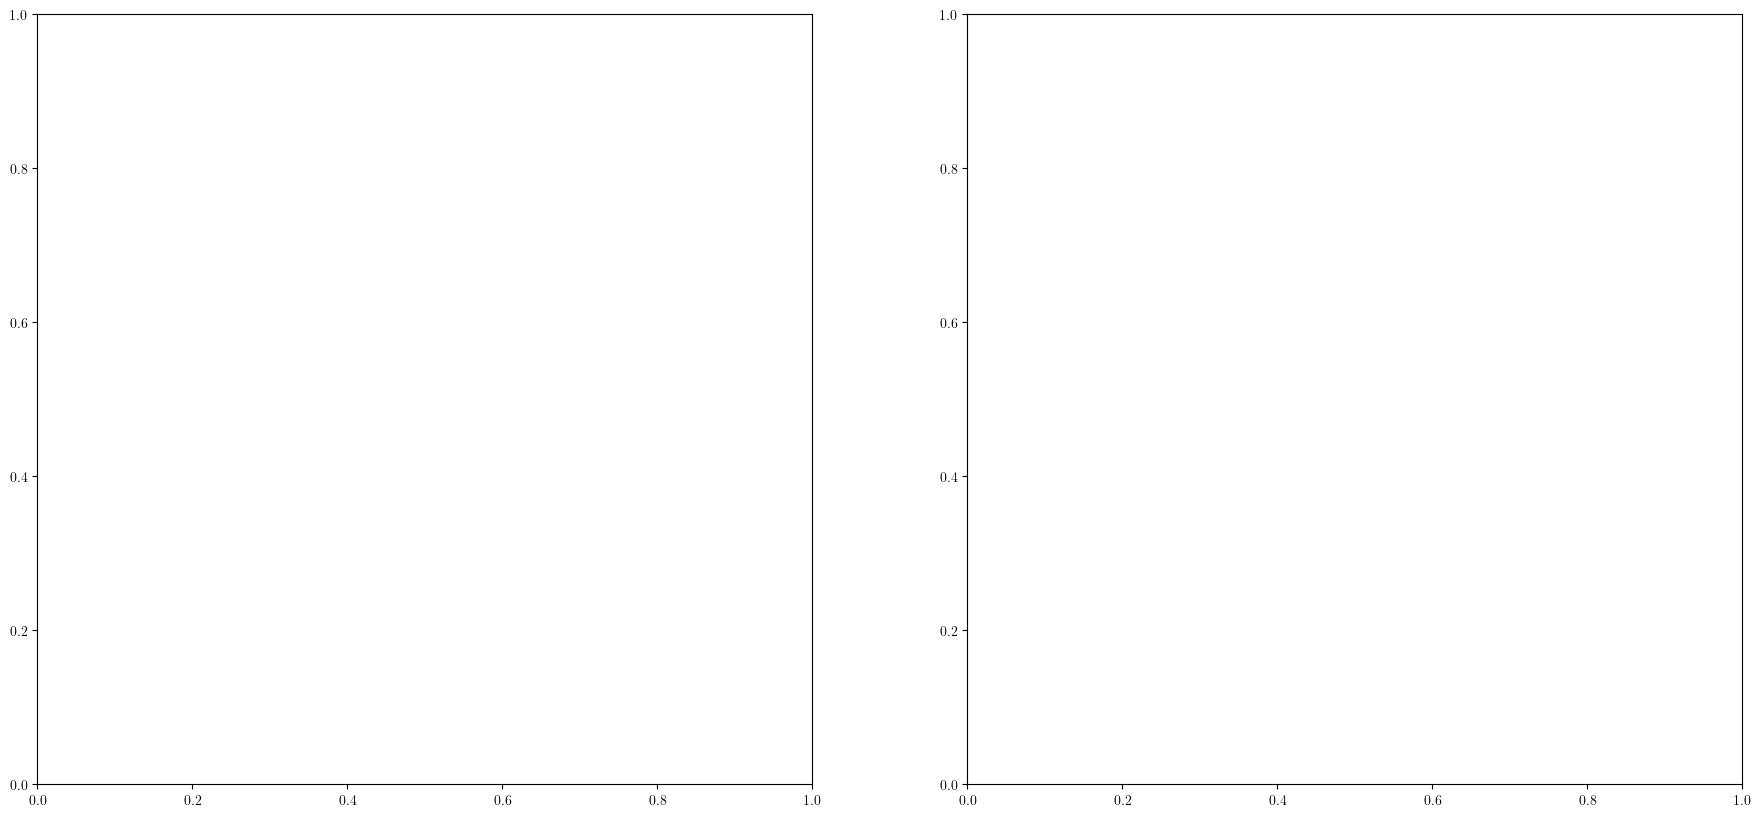

In [287]:
#plot one to one with best_periods_hermes
fig,ax = plt.subplots(1,2,figsize=(22,10))


In [178]:
coralie_data = {'4000-4200':pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift','residual_gls','residual_shape','residual_shift'], dtype=float)
                ,'Hbeta':pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift','residual_gls','residual_shape','residual_shift'], dtype=float)
                ,'5000-5100':pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift','residual_gls','residual_shape','residual_shift'], dtype=float)
                ,'Halpha':pd.DataFrame(columns=['star', 'period', 'gls', 'shape', 'shift','residual_gls','residual_shape','residual_shift'], dtype=float)}
for (idx, range),key in zip(enumerate(range_size_coralie_nolatex),coralie_data.keys()):
    merged_coralie_peaks = pd.merge(truth_periods, coralie14[idx], on='star')
    coralie_residuals = pd.DataFrame(columns=['star', 'period', 'residual_gls', 'residual_shape', 'residual_shift'], dtype=float)
    for i, row in merged_coralie_peaks.iterrows():
        coralie_residuals = coralie_residuals.append({'star': row['star'], 'period': row['period'], 'residual_gls': row['gls'] - row['period'], 'residual_shape': row['shape'] - row['period'], 'residual_shift': row['shift'] - row['period']}, ignore_index=True)
    #merge merged_coralie_peaks and coralie14_residuals on star and period
    merged_coralie = pd.merge(merged_coralie_peaks, coralie_residuals, on=['star', 'period'])
    coralie_data[key] = merged_coralie

4000-4200
                 star     period       gls       shape      shift  \
0  ASASJ103158-5814.7   1.119200  1.119166    0.997021   1.119166   
1               BGCru   3.342540  3.342398    3.342847   3.342398   
2               QZNor   3.786811  3.786540  990.586014   3.786540   
3                RCru   5.825680  5.826409    5.826409   1.203166   
4            V1048Cen   0.922405  0.920307         NaN   0.917517   
5            V1210Cen   4.317000  4.498667         NaN   0.808013   
6              zetGem  10.149531  0.997675    5.084326  10.652371   

   residual_gls  residual_shape  residual_shift  
0     -0.000034       -0.122179       -0.000034  
1     -0.000142        0.000307       -0.000142  
2     -0.000271      986.799203       -0.000271  
3      0.000729        0.000729       -4.622514  
4     -0.002098             NaN       -0.004888  
5      0.181667             NaN       -3.508987  
6     -9.151856       -5.065205        0.502840  
Hbeta
                 star     perio